In [4]:
import numpy as np
import pandas as pd
import polars as pl
import marshal, json
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.patches as patches
from matplotlib import cm
import matplotlib
import json, math
from operator import sub
import scipy.stats
from IPython.display import set_matplotlib_formats
from IPython.display import Image
import matplotlib_inline.backend_inline


#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({
    'font.family': 'serif',
    "font.serif": 'Times',
    'font.size': 12,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'text.latex.preamble': r'\usepackage{amsmath}'
})

v = 501
n = 200
q = 200

In [5]:
def get_rdf_traffic_density(n, i, q, mg):
    num_sent = 0
    num_fwd = 0

    A = n/12
    T = 50#math.sqrt(A) * 1000 / 33.3
    AT = A * T

    num_runs = 5
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_mg{mg}_r{r}.json', 'rb') as f:
                data = json.load(f)
                num_sent += data['num_sent']
                num_fwd += data['num_fwd']
        except:
            errors += 1

    if errors == num_runs:
        return (0,0)
    return (num_sent / (num_runs - errors) / AT, num_fwd / (num_runs- errors) / AT)

def get_rdf_loss_rate(n, i, q, mg):
    loss_rates = []

    num_runs = 15
    errors = 0
    for r in range(num_runs):
        try:
            with open(f'../res/v{v}_parsed/summary_kpi_rdf_n{n}_i{i}_q{q}_mg{mg}_r{r}.json', 'rb') as f:
                data = json.load(f)
                lr = data['avg_loss_rate']
                print(lr)
                if lr > 0:
                    loss_rates.append(lr)
        except:
            errors += 1

    if errors == num_runs:
        return 0
    return np.mean(loss_rates)


0.3099197288660487
0.3457006486891544
0.3241621827358778
0.3347772158948259
0.3208206701355215
0.3183031519467844
0.3318726839589835
0.3102793228477422
0.3158771884974384
0.31640153780486713
0.3083789399901862
0.31682524655678734
0.32082566213628005
0.3384956589085605
0.3134865559859106
0.3334718689000804
0.36705756688550584
0.34485792468005994
0.35548319564164965
0.3423757107897808
0.33607492297997865
0.35673903448600464
0.3337345466749494
0.33940068590343286
0.3388003372472952
0.3324044304924112
0.33707243812412724
0.35886618960930095
0.3372551510908005
0.34218889666939334
0.3762648933203858
0.35306587763574826
0.3675979661455149
0.35472324175312764
0.34687878588662435
0.3687010820414126
0.34431469604283016
0.3493970696618577
0.35090988364156106
0.3401360717412286
0.3477037139368565
0.3522240505313101
0.3714488571746126
0.34703577219586035
0.3452792482332796
0.3593811131464928
0.3732049053979406
0.3542404211556933
0.34547775270885417
0.37502421883350257
0.35916555309520126
0.34934957

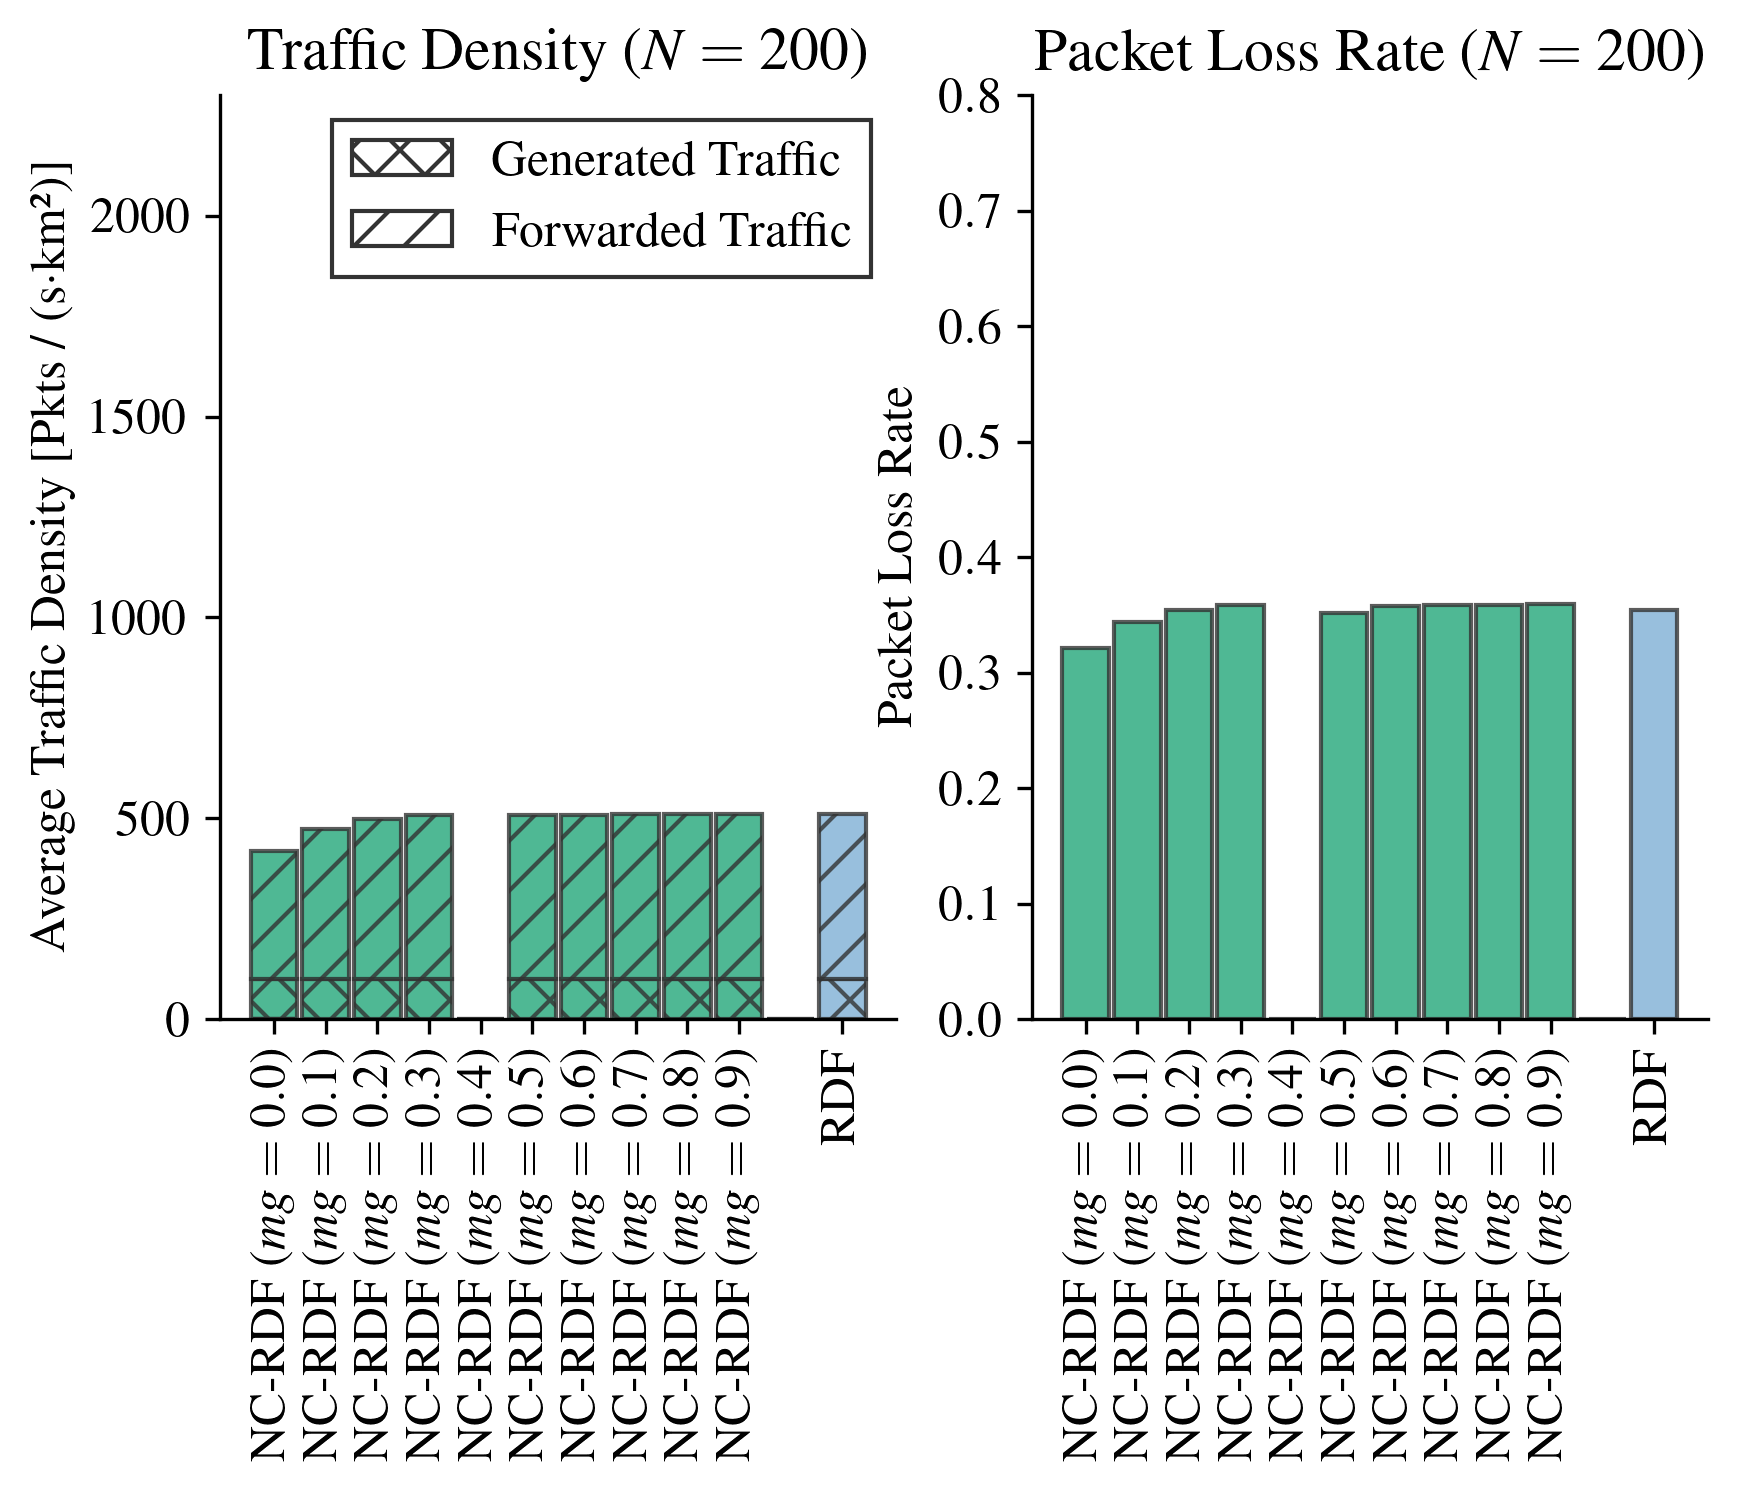

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(6.4, 4))
bar_width = 0.9
rdf_color = '#7eb0d5'
sf_color = '#fd7f6f'
pf_color = '#23a67a'
cbf_color = '#ffa92f'

ax1 = axes[0]
ax2 = axes[1]

ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_ylabel('Average Traffic Density [Pkts / (s$\cdot$km²)]')
ax2.set_ylabel('Packet Loss Rate')

color = [pf_color, '#fff', sf_color, cbf_color, rdf_color, '#fff', sf_color, cbf_color, rdf_color]
color = [pf_color] * 10 + ['#fff'] + [rdf_color]

configs = [0,1,2,3,4,5,6,7,8,9,10,11]
ticks = [0,1,2,3,4,5,6,7,8,9,11]
txd_sent = [
    get_rdf_traffic_density(n, 120, q, 0)[0],
    get_rdf_traffic_density(n, 120, q, 10)[0],
    get_rdf_traffic_density(n, 120, q, 20)[0],
    get_rdf_traffic_density(n, 120, q, 30)[0],
    get_rdf_traffic_density(n, 120, q, 40)[0],
    get_rdf_traffic_density(n, 120, q, 50)[0],
    get_rdf_traffic_density(n, 120, q, 60)[0],
    get_rdf_traffic_density(n, 120, q, 70)[0],
    get_rdf_traffic_density(n, 120, q, 80)[0],
    get_rdf_traffic_density(n, 120, q, 90)[0],
    0,
    get_rdf_traffic_density(n, 120, q, 100)[0],
]

txd_forwarded = [
    get_rdf_traffic_density(n, 120, q, 0)[1],
    get_rdf_traffic_density(n, 120, q, 10)[1],
    get_rdf_traffic_density(n, 120, q, 20)[1],
    get_rdf_traffic_density(n, 120, q, 30)[1],
    get_rdf_traffic_density(n, 120, q, 40)[1],
    get_rdf_traffic_density(n, 120, q, 50)[1],
    get_rdf_traffic_density(n, 120, q, 60)[1],
    get_rdf_traffic_density(n, 120, q, 70)[1],
    get_rdf_traffic_density(n, 120, q, 80)[1],
    get_rdf_traffic_density(n, 120, q, 90)[1],
    0,
    get_rdf_traffic_density(n, 120, q, 100)[1],
]

loss_rates = [
    get_rdf_loss_rate(n, 120, q, 0),
    get_rdf_loss_rate(n, 120, q, 10),
    get_rdf_loss_rate(n, 120, q, 20),
    get_rdf_loss_rate(n, 120, q, 30),
    get_rdf_loss_rate(n, 120, q, 40),
    get_rdf_loss_rate(n, 120, q, 50),
    get_rdf_loss_rate(n, 120, q, 60),
    get_rdf_loss_rate(n, 120, q, 70),
    get_rdf_loss_rate(n, 120, q, 80),
    get_rdf_loss_rate(n, 120, q, 90),
    0,
    get_rdf_loss_rate(n, 120, q, 100),
]

ax1.set_xticks(ticks)
ax1.set_xticklabels([
    'NC-RDF ($mg=0.0$)', 
    'NC-RDF ($mg=0.1$)', 
    'NC-RDF ($mg=0.2$)', 
    'NC-RDF ($mg=0.3$)', 
    'NC-RDF ($mg=0.4$)', 
    'NC-RDF ($mg=0.5$)', 
    'NC-RDF ($mg=0.6$)', 
    'NC-RDF ($mg=0.7$)', 
    'NC-RDF ($mg=0.8$)', 
    'NC-RDF ($mg=0.9$)', 
    'RDF'
    ], rotation="vertical")
# ax1.set_xlim([-1, 9])

max_txd = 2300
# bracket_height = 1600
# 
# ax1.plot([1.5, 4.5],[bracket_height,bracket_height], color='#333', lw=0.5)
# ax1.fill_between([1.2, 4.8],[-max_txd * 0.71, -max_txd * 0.71],[max_txd,max_txd], clip_on=False, facecolor='#333', alpha = 0.1)
# ax1.fill_between([5.2, 8.8],[-max_txd * 0.71, -max_txd * 0.71],[max_txd,max_txd], clip_on=False, facecolor='#333', alpha = 0.25)
# ax1.text(7, -max_txd*0.62, 'GLOBALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
# ax1.text(3, -max_txd*0.62, 'LOCALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
# ax1.plot([0,9], [-max_txd*0.6,-max_txd*0.6], color= '#fff', clip_on=False, lw=2)

# bracket_height = 1300
# ax1.text(7, bracket_height +80, '$i=$120ms', ha="center", va="center")
# ax1.plot([5.5, 8.5],[bracket_height,bracket_height], color='#333', lw=0.5)
# curlyBrace(fig, ax1, [1.5, bracket_height], [4.5,bracket_height], 1, str_text="$i=$60ms", color='#333', clip_on=False)
# curlyBrace(fig, ax1, [5.5, bracket_height], [8.5,bracket_height], 0.2, str_text="$i=$120ms", color='#333', clip_on=False)


# bracket_height = 0.58
# ax2.text(3, bracket_height +0.025, '$i=$60ms', ha="center", va="center")
# ax2.plot([1.5, 4.5],[bracket_height,bracket_height], color='#333', lw=0.5)

# bracket_height = 0.5
# ax2.text(7, bracket_height +0.025, '$i=$120ms', ha="center", va="center")
# ax2.plot([5.5, 8.5],[bracket_height,bracket_height], color='#333', lw=0.5)

max_pl = 0.8
# ax2.fill_between([1.2, 4.8],[-max_pl * 0.71, -max_pl * 0.71],[max_pl,max_pl], clip_on=False, facecolor='#333', alpha = 0.1)
# ax2.fill_between([5.2, 8.8],[-max_pl * 0.71, -max_pl * 0.71],[max_pl,max_pl], clip_on=False, facecolor='#333', alpha = 0.25)
# ax2.text(7, -max_pl*0.62, 'GLOBALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
# ax2.text(3, -max_pl*0.62, 'LOCALLY \nOPTIMAL', ha="center", va="top", color='#333', fontsize=9)
# ax2.plot([0,9], [-max_pl*0.6,-max_pl*0.6], color= '#fff', clip_on=False, lw=2)

ax1.bar(configs, txd_sent, width=bar_width, edgecolor='#333', color=color, hatch="XX", alpha=0.8)
ax1.bar(configs, txd_forwarded, bottom=txd_sent, width=bar_width, edgecolor='#333', color=color, hatch="//", alpha=0.8)

ax1.bar([0], [0], edgecolor='#333', color='#fff', hatch="XX", label="Generated Traffic")
ax1.bar([0], [0], edgecolor='#333', color='#fff', hatch="//", label="Forwarded Traffic")

ax1.set_ylim([0, max_txd])
leg = ax1.legend(fancybox=False, framealpha=1.0)
leg.get_frame().set_edgecolor('#333')

ax2.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)

ax2.bar(configs, loss_rates, width=bar_width, edgecolor='#333', color=color, alpha=0.8)
ax2.set_xticks(ticks)
ax2.set_xticklabels([
    'NC-RDF ($mg=0.0$)', 
    'NC-RDF ($mg=0.1$)', 
    'NC-RDF ($mg=0.2$)', 
    'NC-RDF ($mg=0.3$)', 
    'NC-RDF ($mg=0.4$)', 
    'NC-RDF ($mg=0.5$)', 
    'NC-RDF ($mg=0.6$)', 
    'NC-RDF ($mg=0.7$)', 
    'NC-RDF ($mg=0.8$)', 
    'NC-RDF ($mg=0.9$)', 
    'RDF'
    ], rotation="vertical")

ax1.set_title(f'Traffic Density ($N={n}$)')
ax2.set_title(f'Packet Loss Rate ($N={n}$)')
ax2.set_ylim([0, max_pl])

fig.savefig(f"../figures/nc_rdf_loss_rate_comparison_v{v}.pdf", dpi=500, bbox_inches='tight', pad_inches=0.01)
fig.savefig(f"../figures/nc_rdf_loss_rate_comparison_v{v}.png", dpi=500, bbox_inches='tight', pad_inches=0.01)
plt.show()